# Activating Your First Artificial Neuron

In [2]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [3]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [4]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
y.shape

(1000, 1)

In [5]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

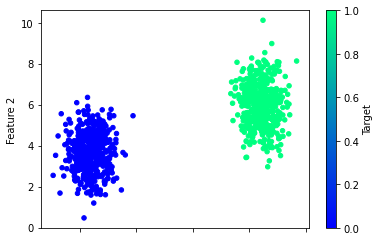

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [7]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 Scale the data using the `StandarScaler`.

In [8]:
# Create scaler instance
X_scaler = StandardScaler()

In [9]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ### Neural Network Model Creation

In [11]:
# Create a sequential model
neuron = Sequential()

2022-03-01 16:36:58.930693: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The initial step is to add the first layer of our neural network.

![First Layer](../Images/tensorflow-neuron-layer-1.png)

In [13]:
# First layer
number_inputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

We finish creating our neural network by adding the output layer.

![Output layer](../Images/tensorflow-neuron-output-layer.png)

In [14]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [15]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [16]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

In [17]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 979us/step - loss: 0.6796 - accuracy: 0.6227
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6733
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.7280
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.9173
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.9213
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.9293
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.9293
Epoch 8/100
24/24 [==============================] - 0s 996us/step - loss: 0.6183 - accuracy: 0.9307
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.9320
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.9333
Epoch

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

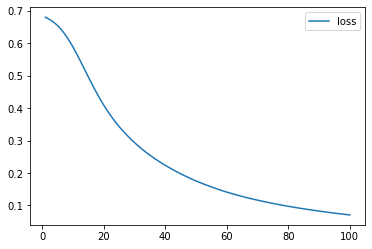

In [18]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

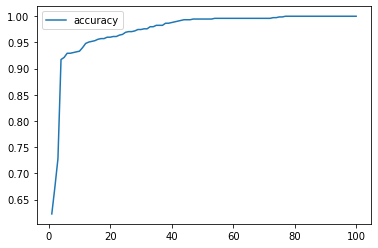

In [19]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [20]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0724 - accuracy: 1.0000 - 133ms/epoch - 17ms/step
Loss: 0.07244070619344711, Accuracy: 1.0


 ### Making Predictions with New Data

In [22]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

In [23]:
# Making predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})
results.head(10)

,predictions,actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


---

# Using a Single Neuron for Non-Linear Data

### Creating Demo Data:

In [24]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [25]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [26]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

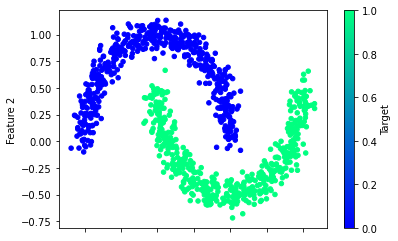

In [27]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [28]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

 Scale the data

In [29]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [30]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [31]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

 ### Fit the Model

In [32]:
# Training the model with the non-linear data
model_moon = neuron.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2871 - accuracy: 0.4480
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0538 - accuracy: 0.4747
Epoch 3/100
24/24 [==============================] - 0s 974us/step - loss: 0.9344 - accuracy: 0.4827
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8709 - accuracy: 0.4973
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8278 - accuracy: 0.5133
Epoch 6/100
24/24 [==============================] - 0s 955us/step - loss: 0.7970 - accuracy: 0.5280
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7720 - accuracy: 0.5480
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7510 - accuracy: 0.5600
Epoch 9/100
24/24 [==============================] - 0s 987us/step - loss: 0.7332 - accuracy: 0.5720
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.5827
Epo

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

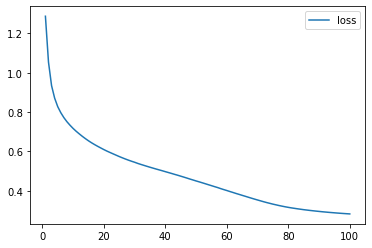

In [33]:
# Create a DataFrame with the history dictionary
df_moon = pd.DataFrame(
    model_moon.history, index=range(1, len(model_moon.history["loss"]) + 1)
)

# Plot the loss
df_moon.plot(y="loss")

<AxesSubplot:>

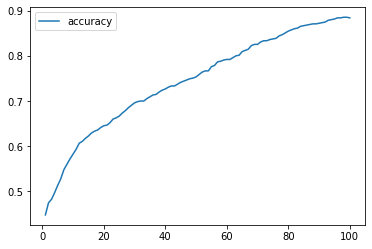

In [34]:
# Plot the accuracy
df_moon.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [35]:
# Evaluate the model using non-linear data
model_moon_loss, model_moon_accuracy = neuron.evaluate(
    X_moon_test_scaled, y_moon_test, verbose=2
)
print(f"Loss: {model_moon_loss}, Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.3104 - accuracy: 0.8520 - 34ms/epoch - 4ms/step
Loss: 0.31041011214256287, Accuracy: 0.8519999980926514


 ### Making Predictions

In [36]:
# Create demo data
X_new_moons, y_new_moons = make_moons(n_samples=10, noise=0.08, random_state=78)

In [37]:
# Making predictions
predictions_moon = (neuron.predict(X_new_moons) > 0.5).astype("int32")

results = pd.DataFrame({"predictions": predictions_moon.ravel(), "actual": y_new_moons})
results.head(10)

,predictions,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,1,1
8,1,1
9,0,1
